In [4]:
import scipy.linalg as la
from numba import jit
def phi(X, C):
    '''compute the cost function of data X with respect to centroid set C'''
    return np.sum([min([la.norm(x-c)**2 for c in C]) for x in X])

In [10]:
def num_closest(C,X):
    '''find the index of centroid that is closest to each data points in X'''
    d_mat = np.sum((C[None,:] - X[:,None])**2, -1)
    close = [np.argmin(d) for d in d_mat]
    return close
    

In [37]:
import scipy.stats as stats
from sklearn.cluster import KMeans
def kmeans_paral(X, k, l):
    '''impliment Kmeans||'''
    C_idx = [np.random.choice(X.shape[0])]  #uniformly sample one point into the centroid set
    dist = phi(X,X[C_idx])
    max_it = int(np.log(dist))
    for it in range(max_it):
        Cprime = [i for i,x in enumerate(X) if stats.uniform().rvs(1)< l*phi(x,C)/dist] #sample each data independently into centroid set
        C_idx = list(set(C_idx) | set(Cprime))
        dist = phi(X,X[C_idx])
    close = num_closest(X[C_idx],X)
    w = [close.count(c) for c in C_idx] #calculate weight of each centroid
    re = sum([[j]*w[i] for i,j in enumerate(C_idx)],[])
    fit = KMeans(n_clusters = k).fit(X[re]) #recluster the weighted points into k clusters
    return fit.cluster_centers_
        

In [47]:
%%time
data = "54.0 -65.0  0.0  71.0 -31.0  53.0  8.0 111.0  1.0  -9.0 -36.0  52.0 -22.0 -76.0  0.0  20.0 34.0 129.0 28.0  84.0 12.0 -38.0 -21.0 -26.0 -6.0 -41.0 21.0  45.0 38.0 -90.0 -24.0  10.0 -38.0  35.0 86.0 -57.0 58.0  -1.0 -9.0  -3.0 70.0 -74.0 -20.0  70.0 -43.0  44.0 59.0 -26.0 -5.0 114.0 83.0 -41.0 27.0 153.0 12.0 -49.0 30.0 -65.0 31.0 -12.0 -57.0  28.0 44.0 -28.0  7.0  -7.0 54.0  -8.0 65.0  -8.0 -35.0  25.0 46.0  79.0  5.0 118.0 56.0   4.0 -21.0  54.0 -40.0  45.0 -43.0  51.0 57.0 -21.0  0.0   0.0 25.0  15.0 56.0 -25.0 -34.0  56.0 -24.0  36.0 -25.0  49.0 64.0 -26.0 63.0 -48.0 37.0 155.0 -5.0 -24.0  2.0  28.0 -18.0 -58.0 -10.0  82.0 12.0 -58.0 -40.0 -28.0 -16.0  28.0"
X = np.array( [float(x) for x in data.split()]).reshape([-1,2])
init = kmeans_paral(X, 3, 2)

CPU times: user 1.32 s, sys: 12.3 ms, total: 1.33 s
Wall time: 1.32 s


/opt/conda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


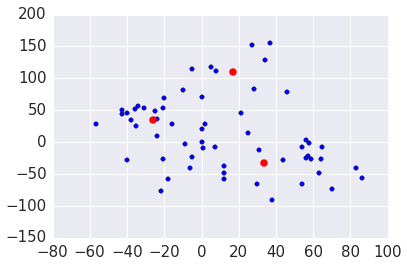

In [48]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(init[:,0],init[:,1], marker='o',s=50,color='red')